In [50]:
from backtester import *

Load price data. For convenience, we will be running strategies on one instrument, but let's check if it works on two instruments.

In [51]:
aapl = Instrument('AAPL', './data/instruments/AAPL.csv')
aapl1 = Instrument('AAPL1', './data/instruments/AAPL.csv')
aapl.get_data_1min()
aapl1.get_data_1min()

This function reads a strategy from the path folder and simulates it

In [52]:
def simulate_strategy(path, instruments, start_date, end_date, verbose=True):
    StrategyClass = import_single_class_from_file(path+'/_strategy.py')
    bt = BackTester(StrategyClass)
    bt.initialize_backtest(instruments, path+'/_config.yaml')
    bt.simulation(start_date, end_date, verbose=verbose)
    bt.visualize_instrument(aapl)
    bt.visualize_pnl()
    bt.save_results(path)

Let's test it on one strategy

In [53]:
path = 'strategy_aroon_crossover_delivery'

AAPL resampling 15
AAPL1 resampling 15
2024-01-17 09:30:00
['AAPL', 'AAPL1'] [{'action': 'SELL'}, {'action': 'SELL'}]
Total Position: {'AAPL': -5, 'AAPL1': -5}
2024-02-07 12:00:00
['AAPL', 'AAPL1'] [{'action': 'BUY'}, {'action': 'BUY'}]
Total Position: {'AAPL': 5, 'AAPL1': 5}
2024-02-08 12:30:00
['AAPL', 'AAPL1'] [{'action': 'SELL'}, {'action': 'SELL'}]
Total Position: {'AAPL': -5, 'AAPL1': -5}
2024-02-15 12:30:00
['AAPL', 'AAPL1'] [{'action': 'SELL'}, {'action': 'SELL'}]
Total Position: {'AAPL': -5, 'AAPL1': -5}
2024-02-16 09:30:00
['AAPL', 'AAPL1'] [{'action': 'BUY'}, {'action': 'BUY'}]
Total Position: {'AAPL': 5, 'AAPL1': 5}


/Users/andreyperfilyev/Python/Manifold Tech/pyalgostrategypool/pyalgostrategypool/backtester.py:35: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.data_resampled = self.data_1min.resample(str(nmin)+'T').agg({
/Users/andreyperfilyev/Python/Manifold Tech/pyalgostrategypool/pyalgostrategypool/backtester.py:35: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.data_resampled = self.data_1min.resample(str(nmin)+'T').agg({


2024-02-20 11:30:00
['AAPL', 'AAPL1'] [{'action': 'SELL'}, {'action': 'SELL'}]
Total Position: {'AAPL': -5, 'AAPL1': -5}
2024-03-07 09:30:00
['AAPL', 'AAPL1'] [{'action': 'SELL'}, {'action': 'SELL'}]
Total Position: {'AAPL': -5, 'AAPL1': -5}
2024-03-11 12:30:00
['AAPL', 'AAPL1'] [{'action': 'BUY'}, {'action': 'BUY'}]
Total Position: {'AAPL': 5, 'AAPL1': 5}
2024-03-13 09:30:00
['AAPL', 'AAPL1'] [{'action': 'SELL'}, {'action': 'SELL'}]
Total Position: {'AAPL': -5, 'AAPL1': -5}
2024-03-14 09:30:00
['AAPL', 'AAPL1'] [{'action': 'BUY'}, {'action': 'BUY'}]
Total Position: {'AAPL': 5, 'AAPL1': 5}
2024-03-15 10:00:00
['AAPL', 'AAPL1'] [{'action': 'SELL'}, {'action': 'SELL'}]
Total Position: {'AAPL': -5, 'AAPL1': -5}
2024-03-18 12:30:00
['AAPL', 'AAPL1'] [{'action': 'BUY'}, {'action': 'BUY'}]
Total Position: {'AAPL': 5, 'AAPL1': 5}
2024-03-19 09:30:00
['AAPL', 'AAPL1'] [{'action': 'SELL'}, {'action': 'SELL'}]
Total Position: {'AAPL': -5, 'AAPL1': -5}
2024-03-27 09:30:00
['AAPL', 'AAPL1'] [{'act

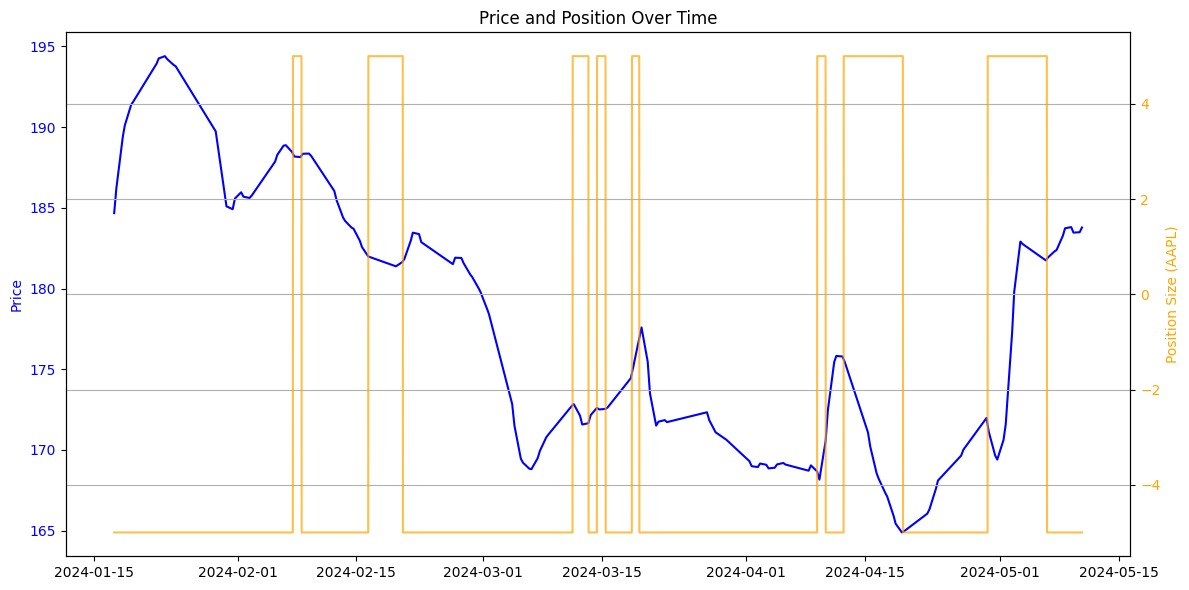

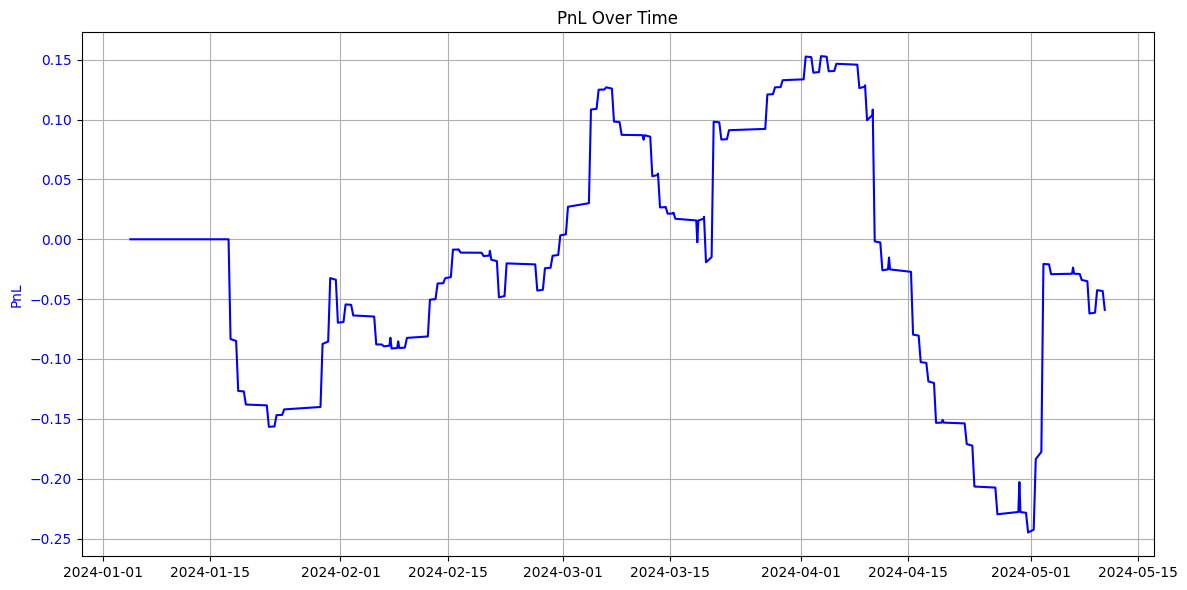

In [54]:
simulate_strategy(path, [aapl, aapl1], '20240101', None, verbose=True)

Now let's run as many strategies as we can (exclude options)

In [55]:
import os
strategy_subfolders = [
    os.path.join('.', name)
    for name in os.listdir('.')
    if os.path.isdir(os.path.join('.', name)) and name.startswith('strategy') and 'options' not in name.split('_') 
]

In [56]:
strategy_subfolders

['./strategy_bollinger_bands_delivery',
 './strategy_stochastic_crossover_intraday',
 './strategy_rsi_macd_crossover_intraday',
 './strategy_vwap_crossover_intraday',
 './strategy_macd_crossover_delivery',
 './strategy_ema_regular_order_delivery',
 './strategy_inverse_ema_scalping_regular_order_delivery',
 './strategy_volatility_trend_atr_intraday',
 './strategy_mean_reversion_bollinger_bands_delivery',
 './strategy_reverse_rsi_crossover_delivery',
 './strategy_aroon_crossover_intraday',
 './strategy_macd_crossover_intraday',
 './strategy_ema_regular_order_intraday',
 './strategy_stochastic_crossover_delivery',
 './strategy_bollinger_bands_intraday',
 './strategy_vwap_crossover_delivery',
 './strategy_rsi_macd_crossover_delivery',
 './strategy_mean_reversion_bollinger_bands_intraday',
 './strategy_inverse_ema_scalping_regular_order_intraday',
 './strategy_volatility_trend_atr_delivery',
 './strategy_reverse_rsi_crossover_intraday',
 './strategy_aroon_crossover_delivery']

Strategy: ./strategy_bollinger_bands_delivery
AAPL resampling 60


/Users/andreyperfilyev/Python/Manifold Tech/pyalgostrategypool/pyalgostrategypool/backtester.py:35: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.data_resampled = self.data_1min.resample(str(nmin)+'T').agg({


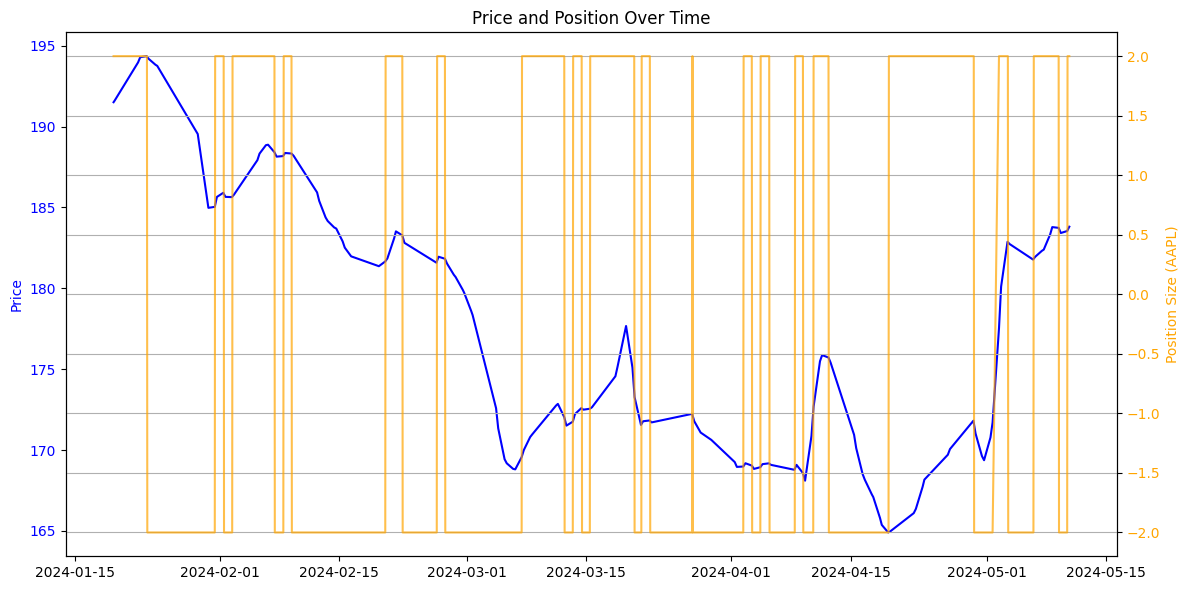

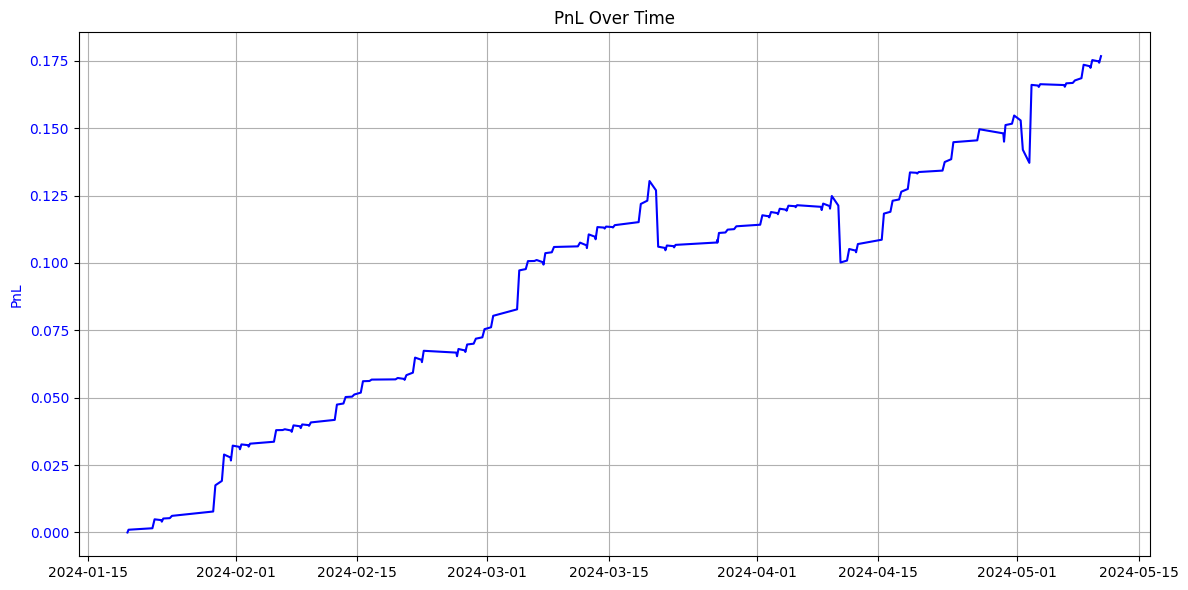

Strategy: ./strategy_stochastic_crossover_intraday
AAPL resampling 60


/Users/andreyperfilyev/Python/Manifold Tech/pyalgostrategypool/pyalgostrategypool/backtester.py:35: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.data_resampled = self.data_1min.resample(str(nmin)+'T').agg({


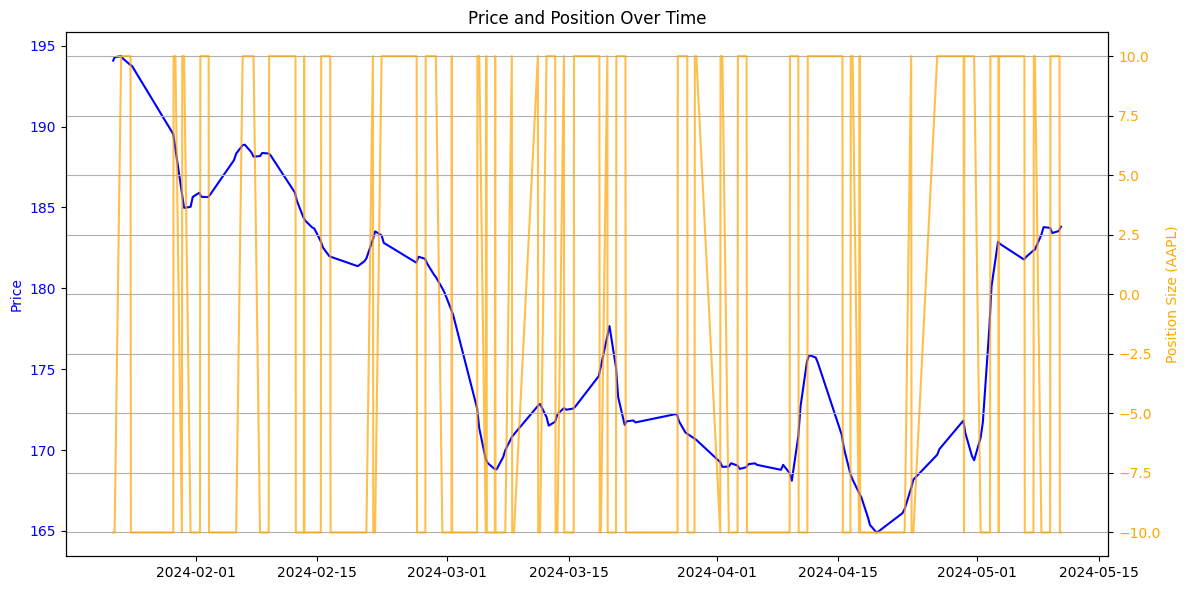

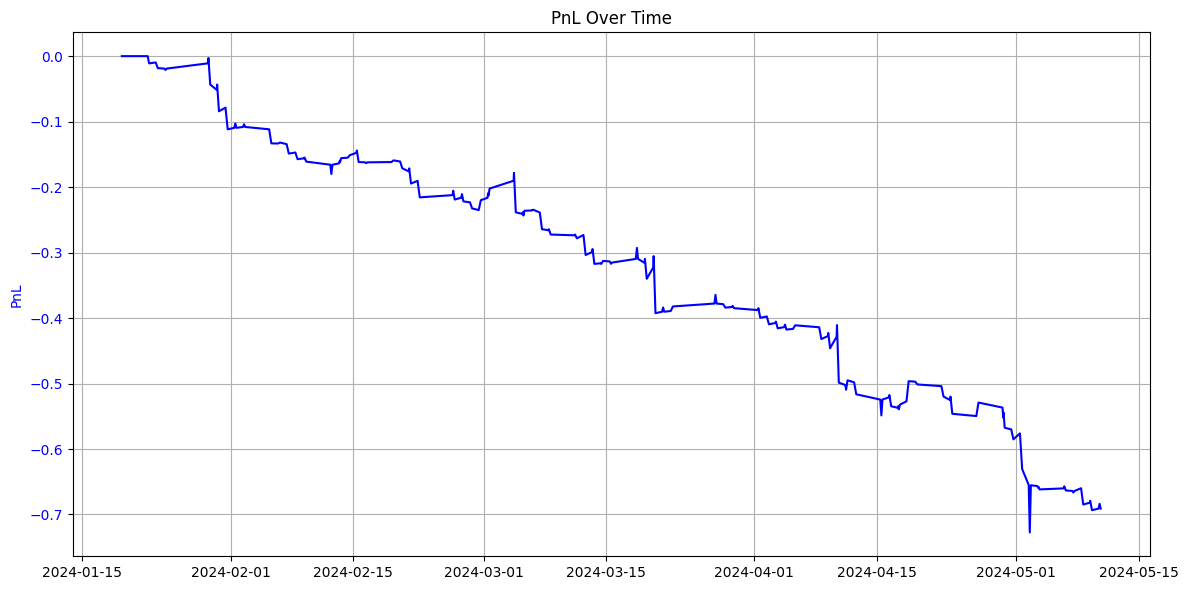

Strategy: ./strategy_rsi_macd_crossover_intraday
AAPL resampling 60


/Users/andreyperfilyev/Python/Manifold Tech/pyalgostrategypool/pyalgostrategypool/backtester.py:35: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.data_resampled = self.data_1min.resample(str(nmin)+'T').agg({


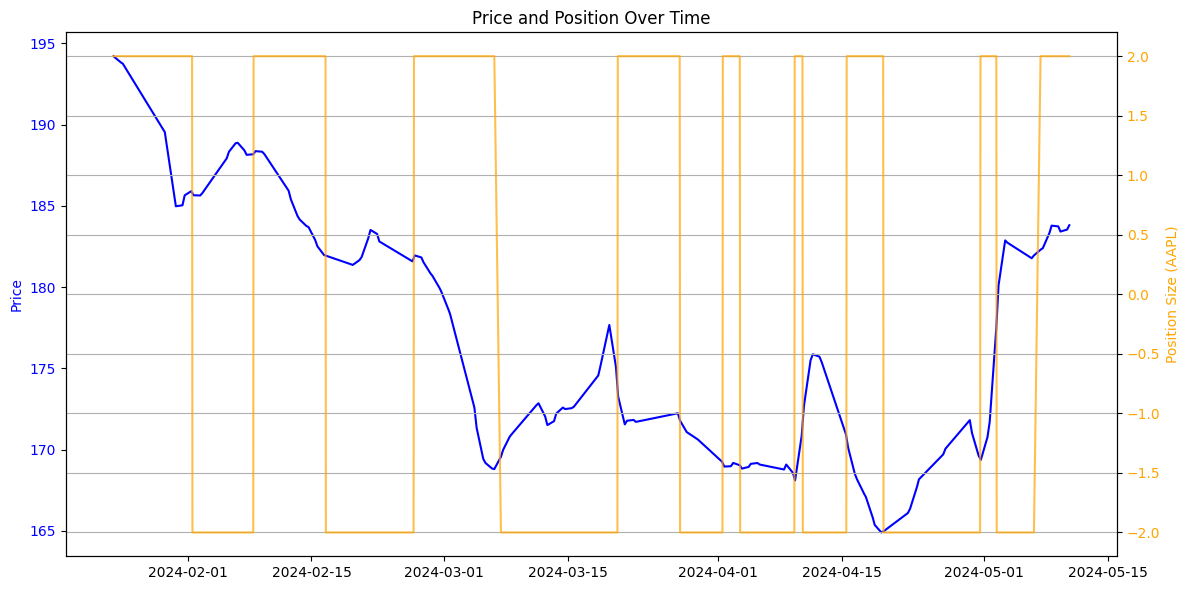

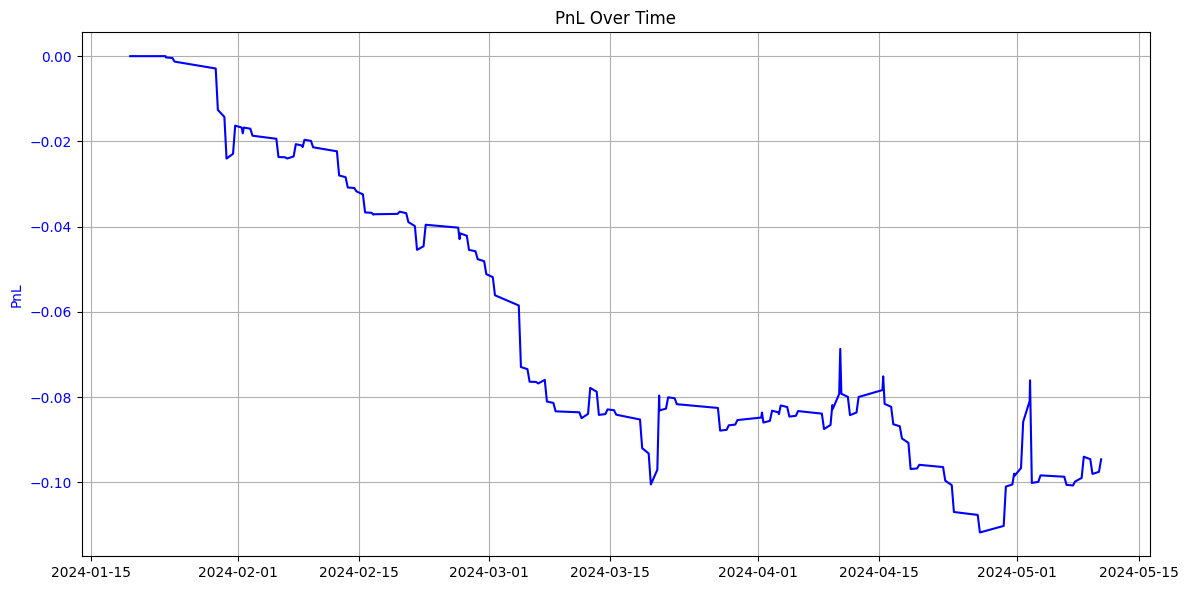

Strategy: ./strategy_vwap_crossover_intraday
AAPL resampling 60
SKIP
Strategy: ./strategy_macd_crossover_delivery
AAPL resampling 60


/Users/andreyperfilyev/Python/Manifold Tech/pyalgostrategypool/pyalgostrategypool/backtester.py:35: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.data_resampled = self.data_1min.resample(str(nmin)+'T').agg({
/Users/andreyperfilyev/Python/Manifold Tech/pyalgostrategypool/pyalgostrategypool/backtester.py:35: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.data_resampled = self.data_1min.resample(str(nmin)+'T').agg({


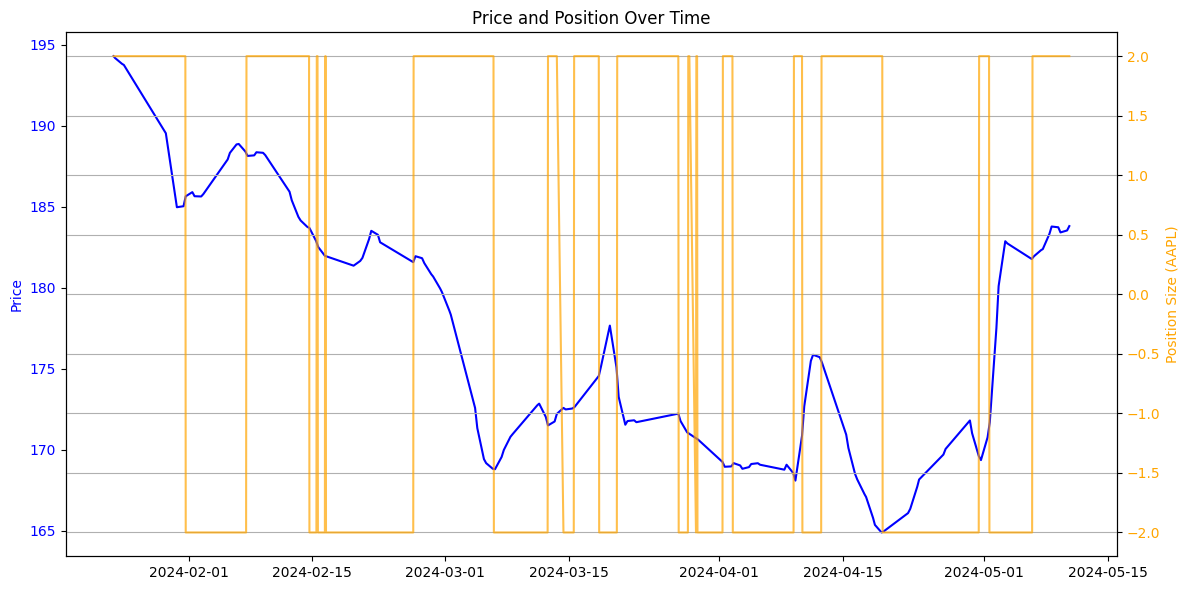

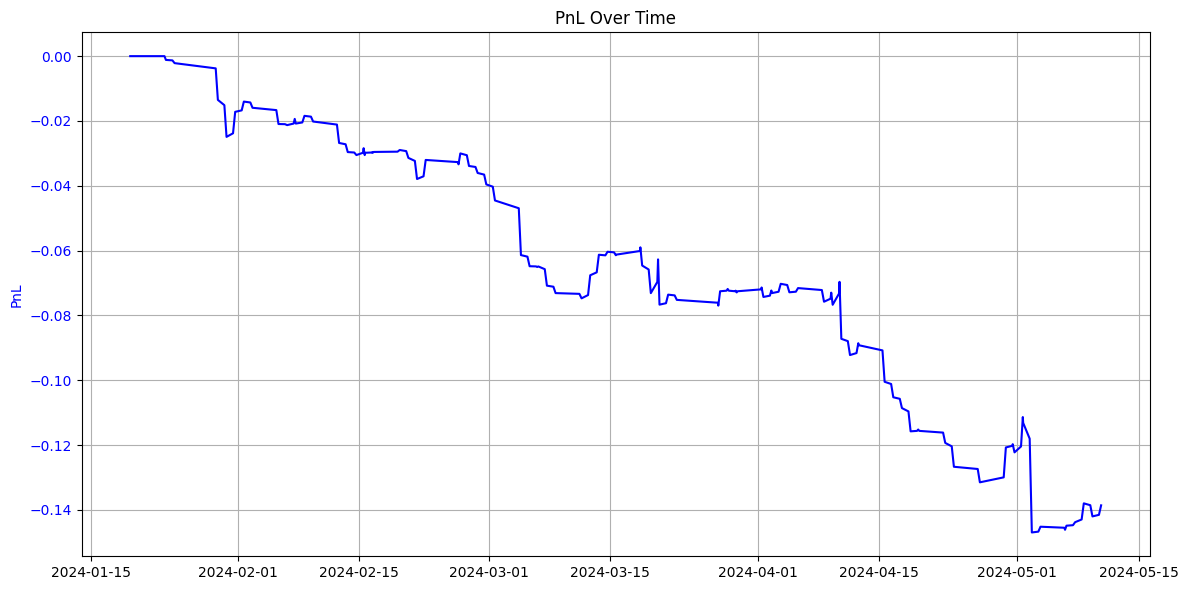

Strategy: ./strategy_ema_regular_order_delivery
AAPL resampling 60


/Users/andreyperfilyev/Python/Manifold Tech/pyalgostrategypool/pyalgostrategypool/backtester.py:35: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.data_resampled = self.data_1min.resample(str(nmin)+'T').agg({


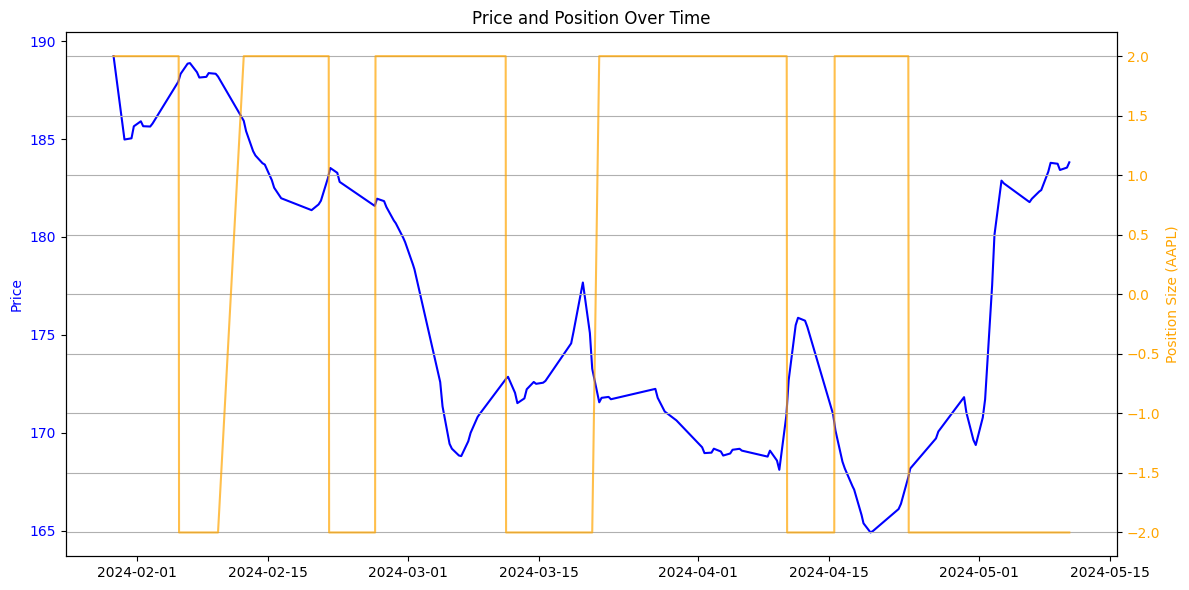

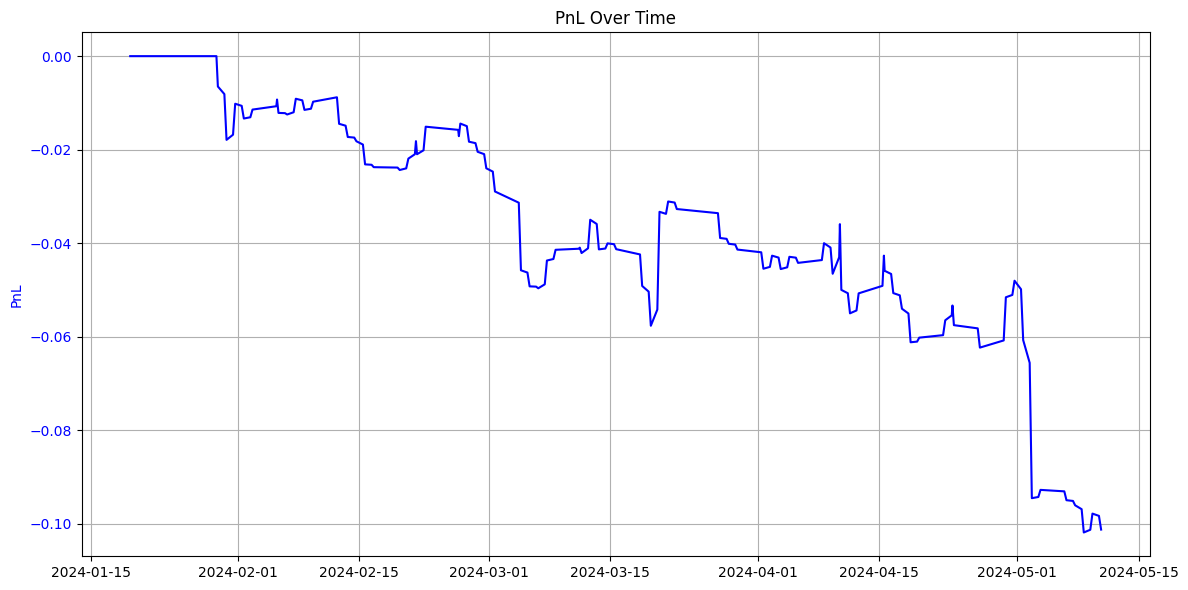

Strategy: ./strategy_inverse_ema_scalping_regular_order_delivery
AAPL resampling 60


/Users/andreyperfilyev/Python/Manifold Tech/pyalgostrategypool/pyalgostrategypool/backtester.py:35: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.data_resampled = self.data_1min.resample(str(nmin)+'T').agg({


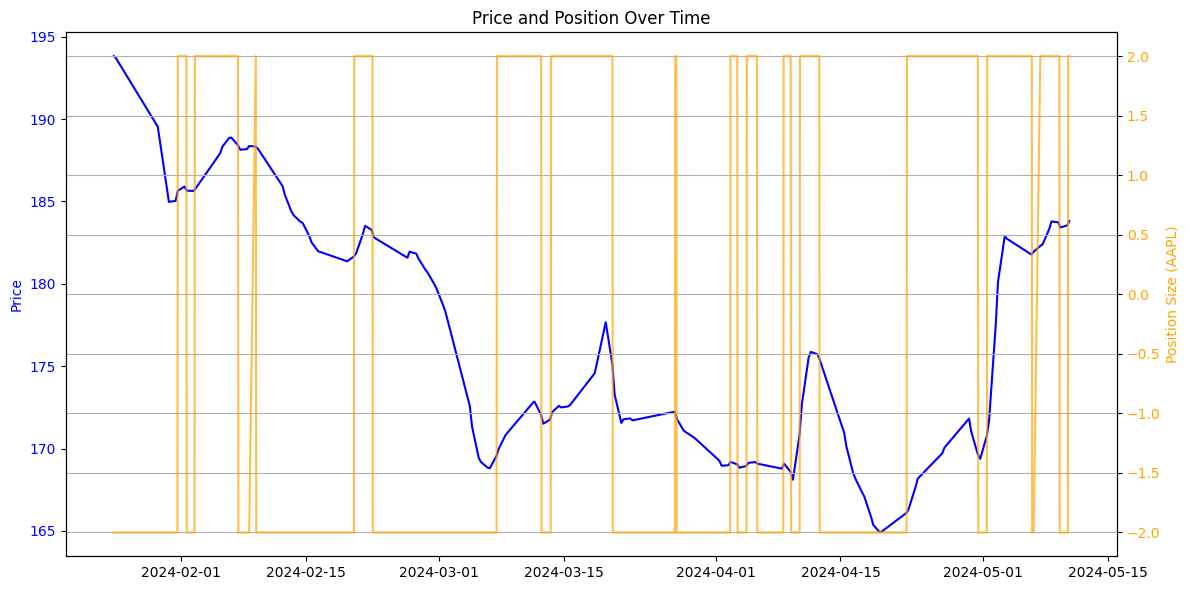

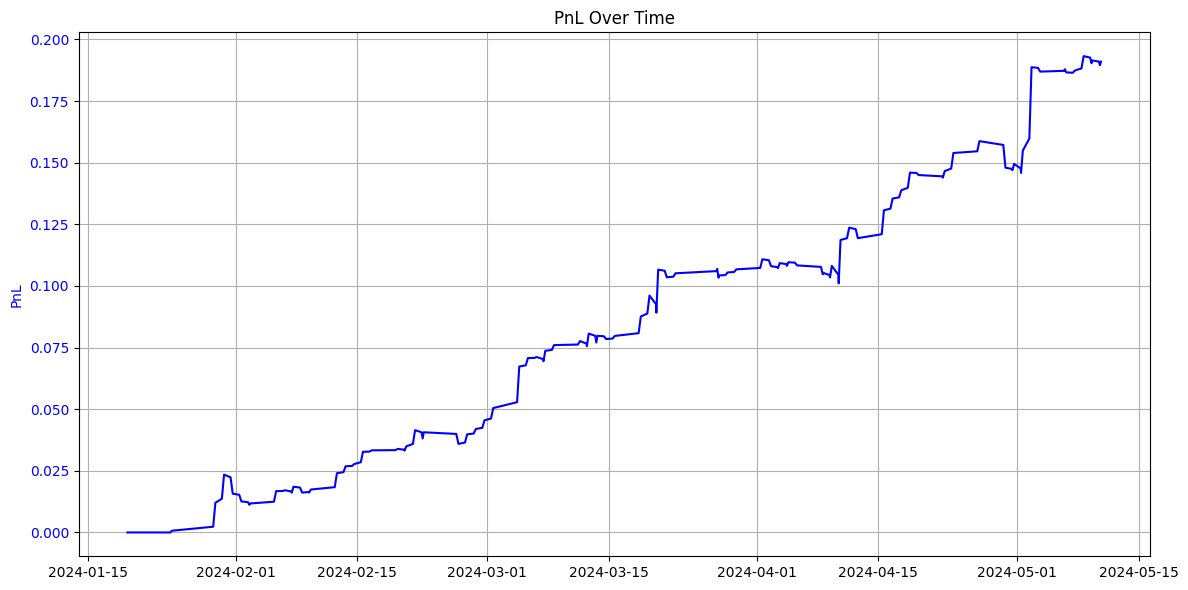

Strategy: ./strategy_volatility_trend_atr_intraday
AAPL resampling 60


/Users/andreyperfilyev/Python/Manifold Tech/pyalgostrategypool/pyalgostrategypool/backtester.py:35: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.data_resampled = self.data_1min.resample(str(nmin)+'T').agg({


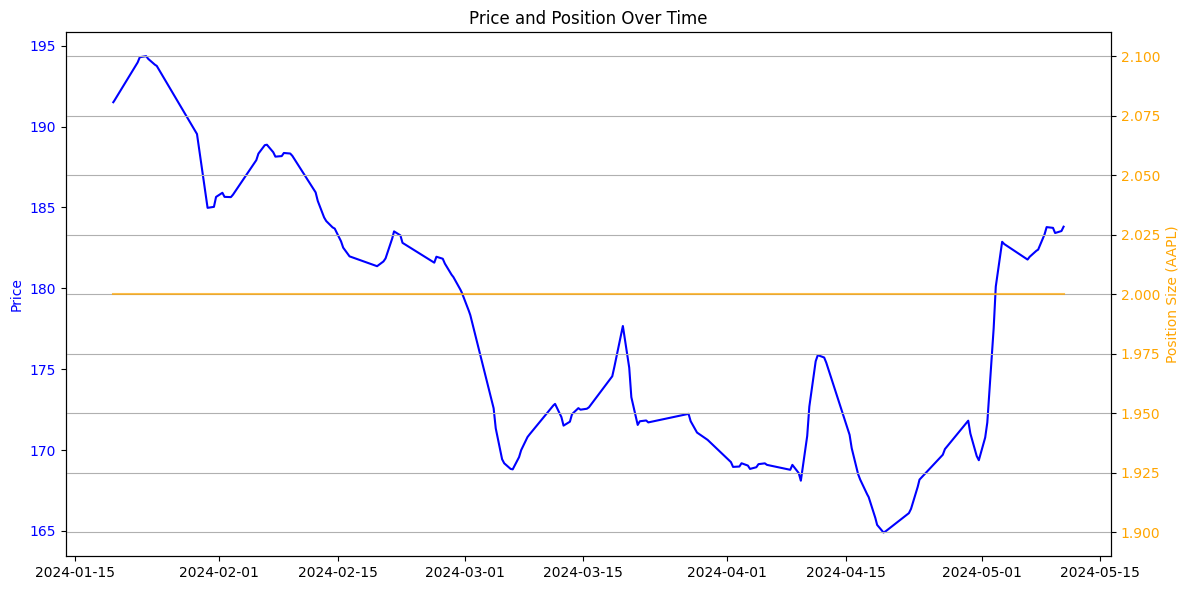

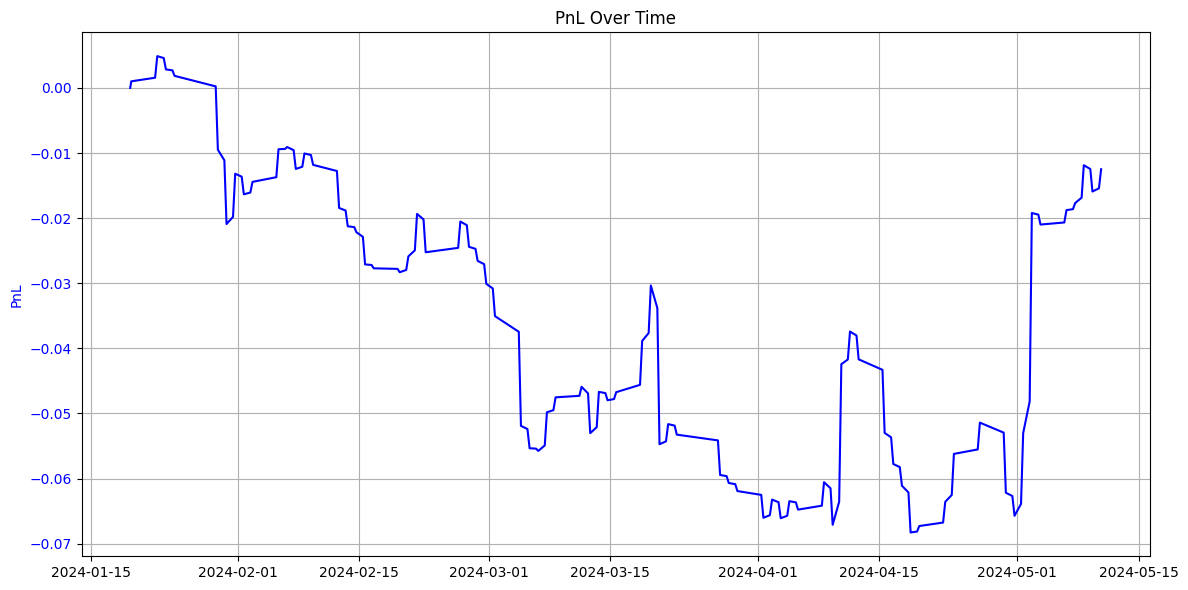

Strategy: ./strategy_mean_reversion_bollinger_bands_delivery
AAPL resampling 60


/Users/andreyperfilyev/Python/Manifold Tech/pyalgostrategypool/pyalgostrategypool/backtester.py:35: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.data_resampled = self.data_1min.resample(str(nmin)+'T').agg({


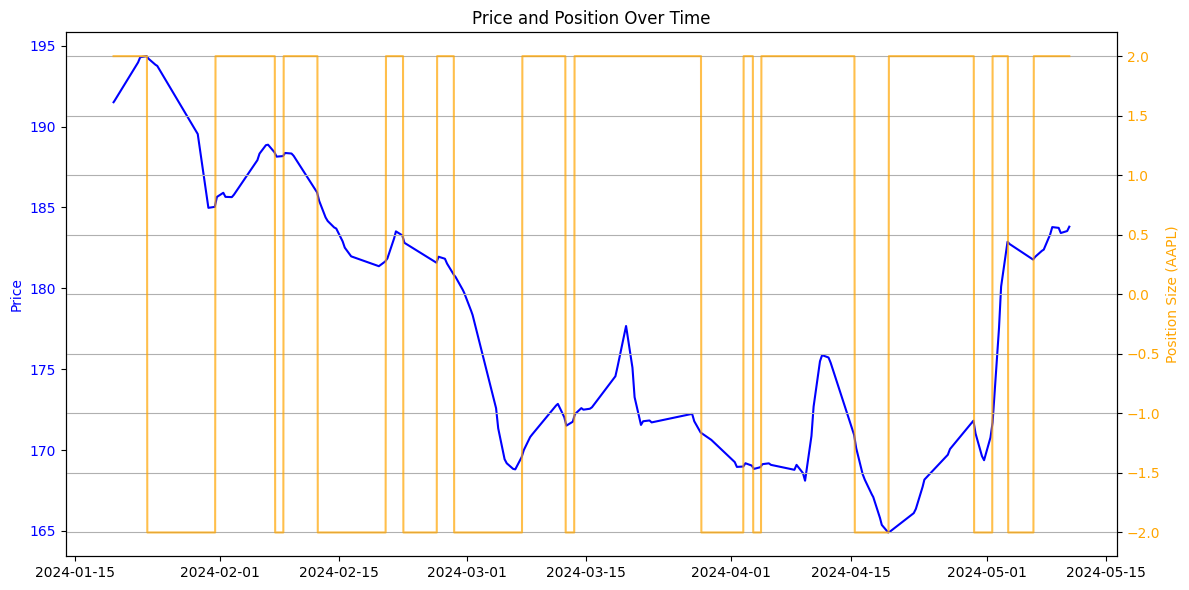

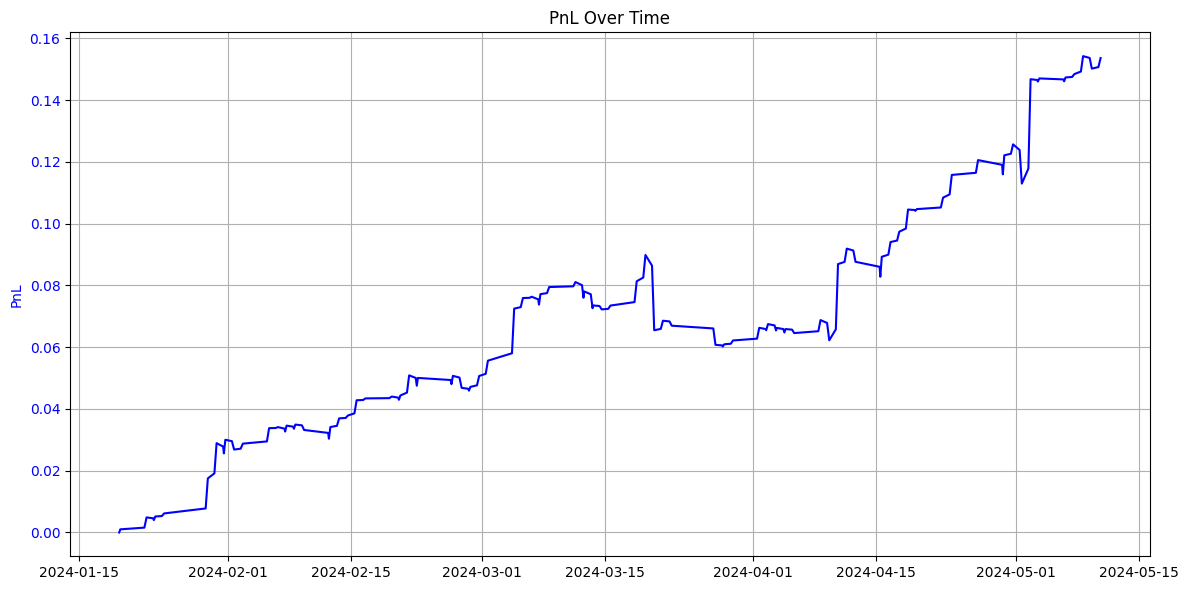

Strategy: ./strategy_reverse_rsi_crossover_delivery
AAPL resampling 60


/Users/andreyperfilyev/Python/Manifold Tech/pyalgostrategypool/pyalgostrategypool/backtester.py:35: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.data_resampled = self.data_1min.resample(str(nmin)+'T').agg({


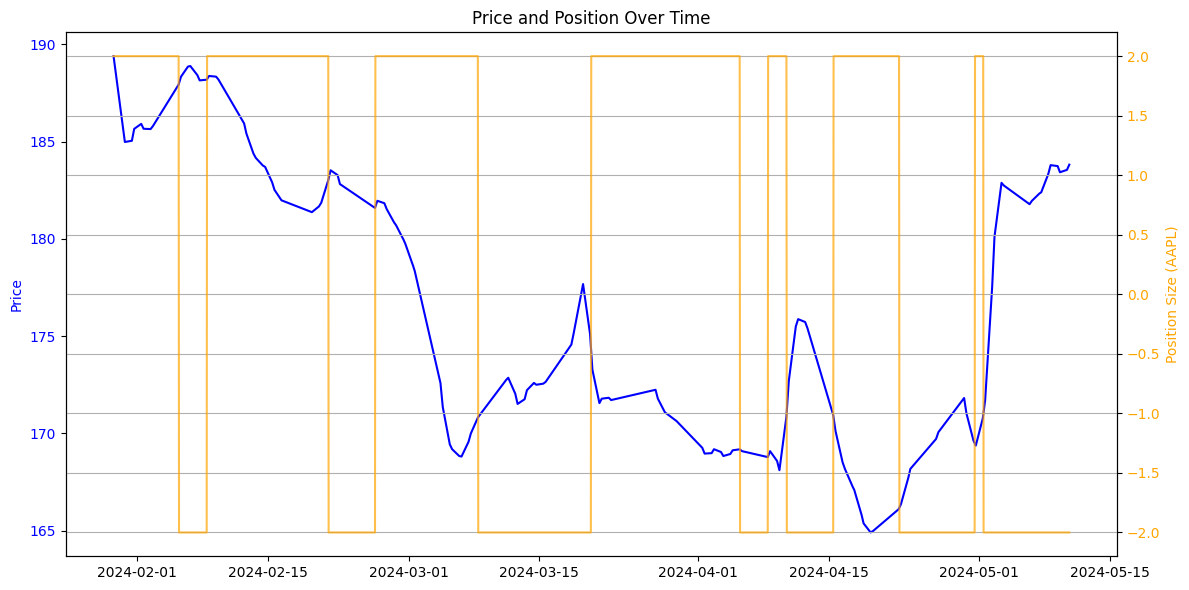

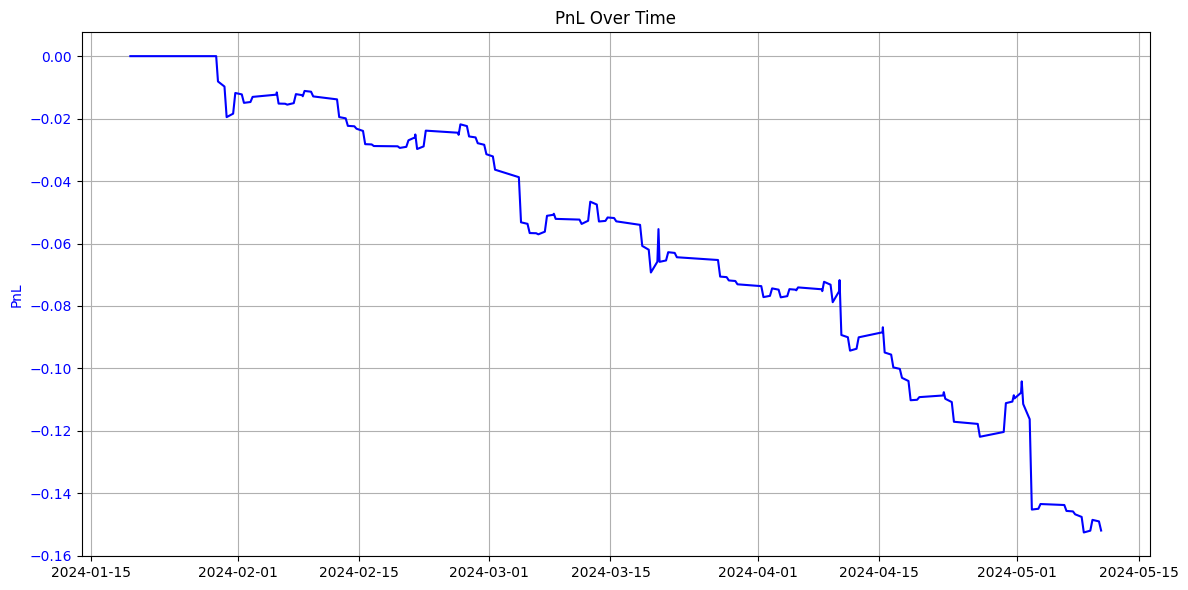

Strategy: ./strategy_aroon_crossover_intraday
AAPL resampling 15


/Users/andreyperfilyev/Python/Manifold Tech/pyalgostrategypool/pyalgostrategypool/backtester.py:35: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.data_resampled = self.data_1min.resample(str(nmin)+'T').agg({


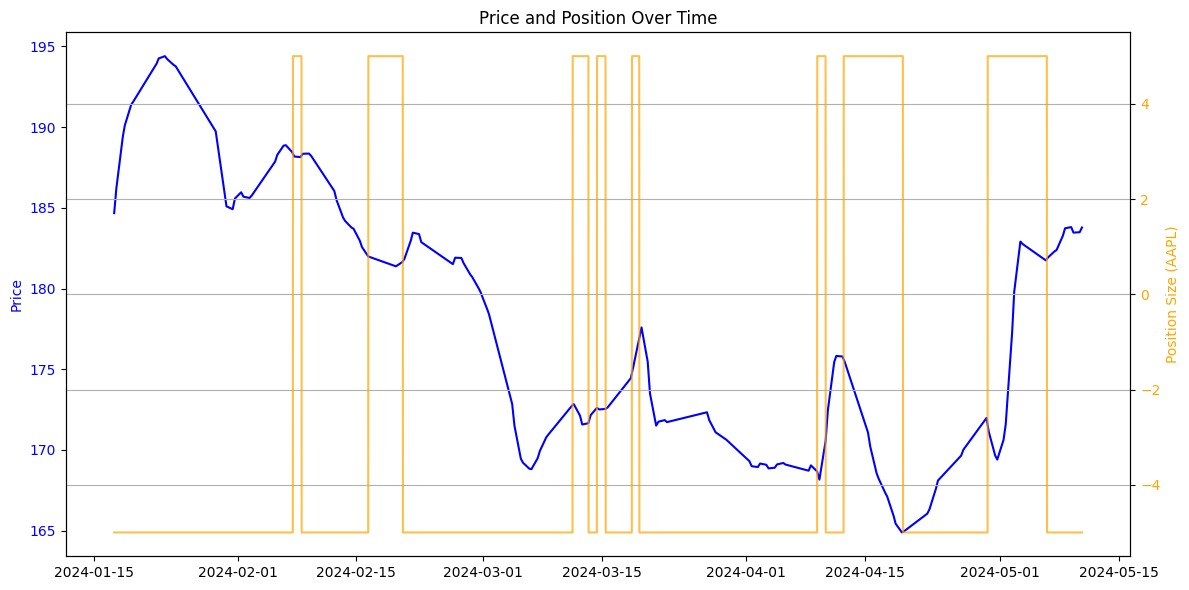

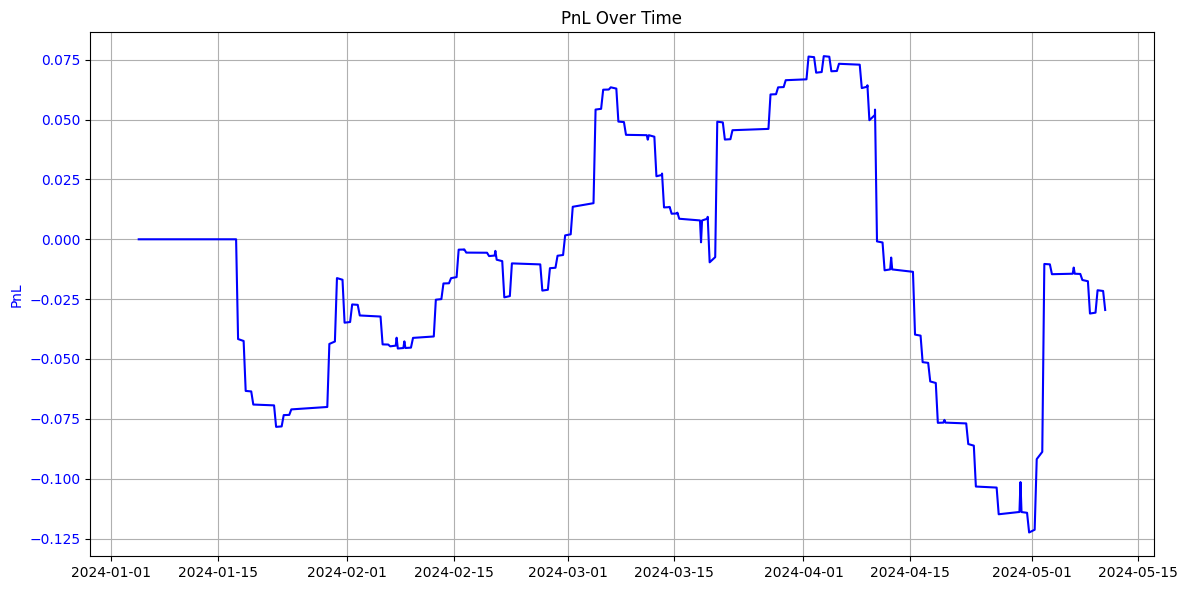

Strategy: ./strategy_macd_crossover_intraday
AAPL resampling 5


/Users/andreyperfilyev/Python/Manifold Tech/pyalgostrategypool/pyalgostrategypool/backtester.py:35: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.data_resampled = self.data_1min.resample(str(nmin)+'T').agg({


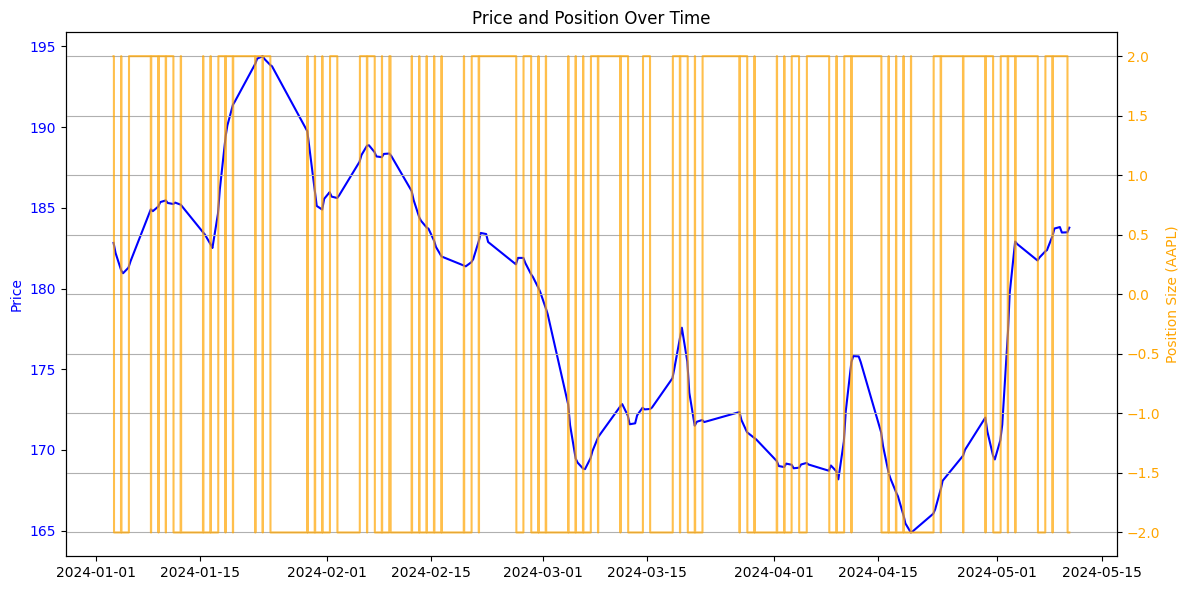

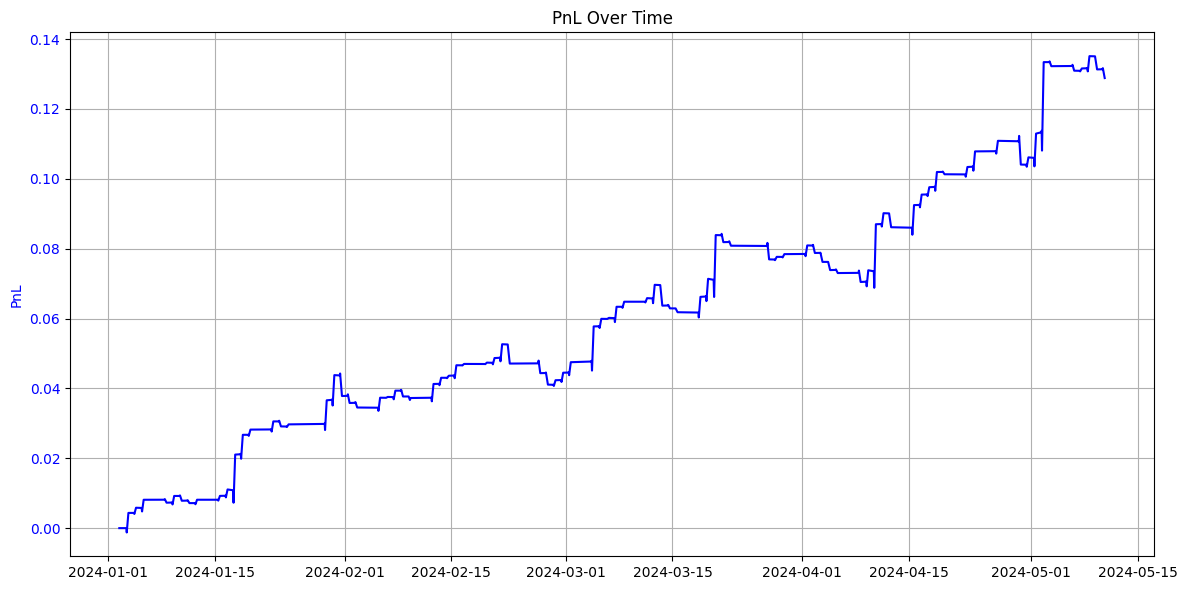

Strategy: ./strategy_ema_regular_order_intraday
AAPL resampling 60


/Users/andreyperfilyev/Python/Manifold Tech/pyalgostrategypool/pyalgostrategypool/backtester.py:35: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.data_resampled = self.data_1min.resample(str(nmin)+'T').agg({


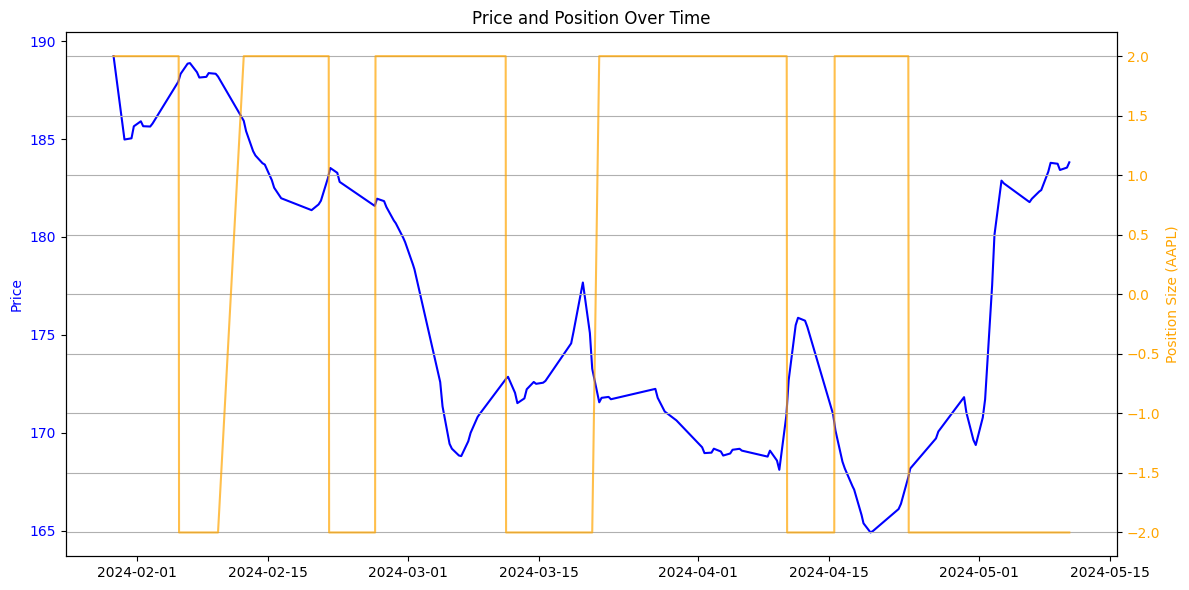

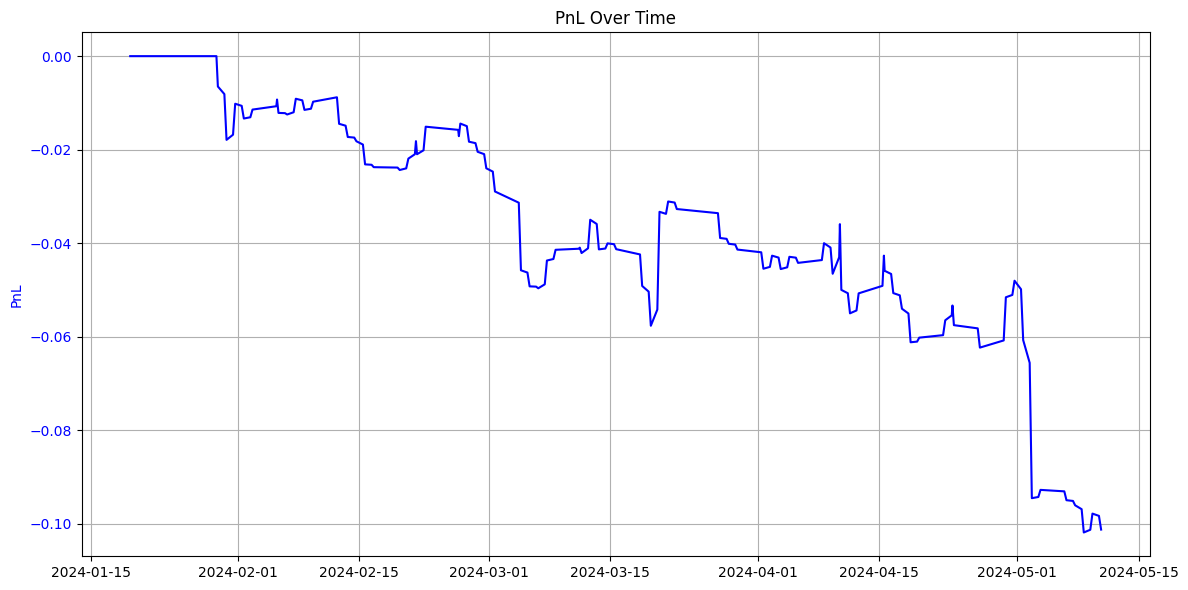

Strategy: ./strategy_stochastic_crossover_delivery
AAPL resampling 60


/Users/andreyperfilyev/Python/Manifold Tech/pyalgostrategypool/pyalgostrategypool/backtester.py:35: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.data_resampled = self.data_1min.resample(str(nmin)+'T').agg({


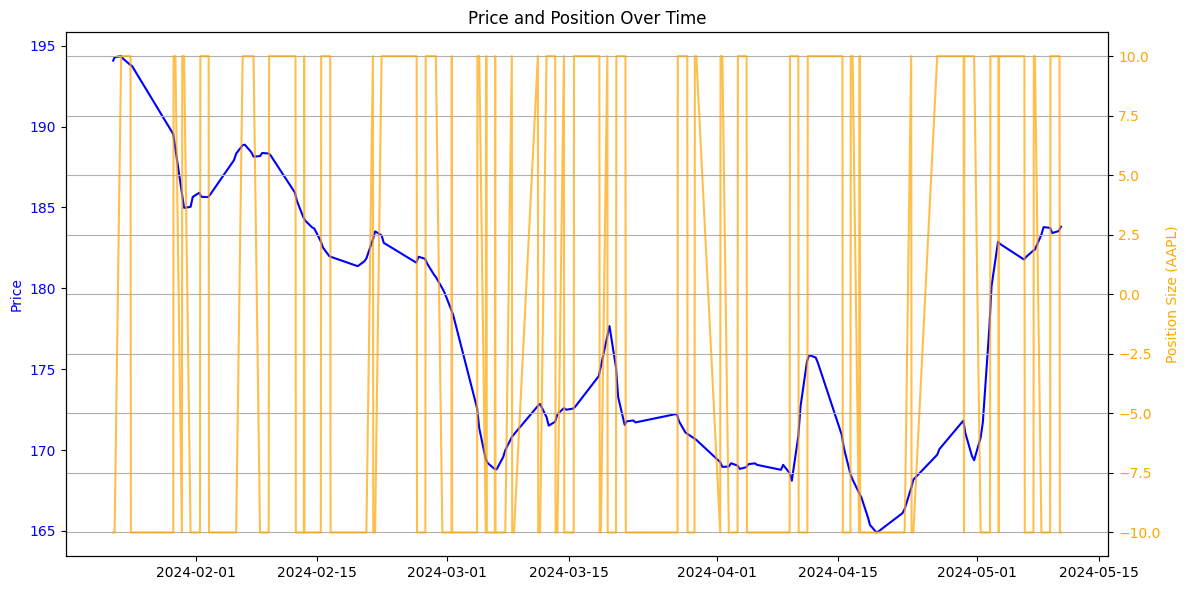

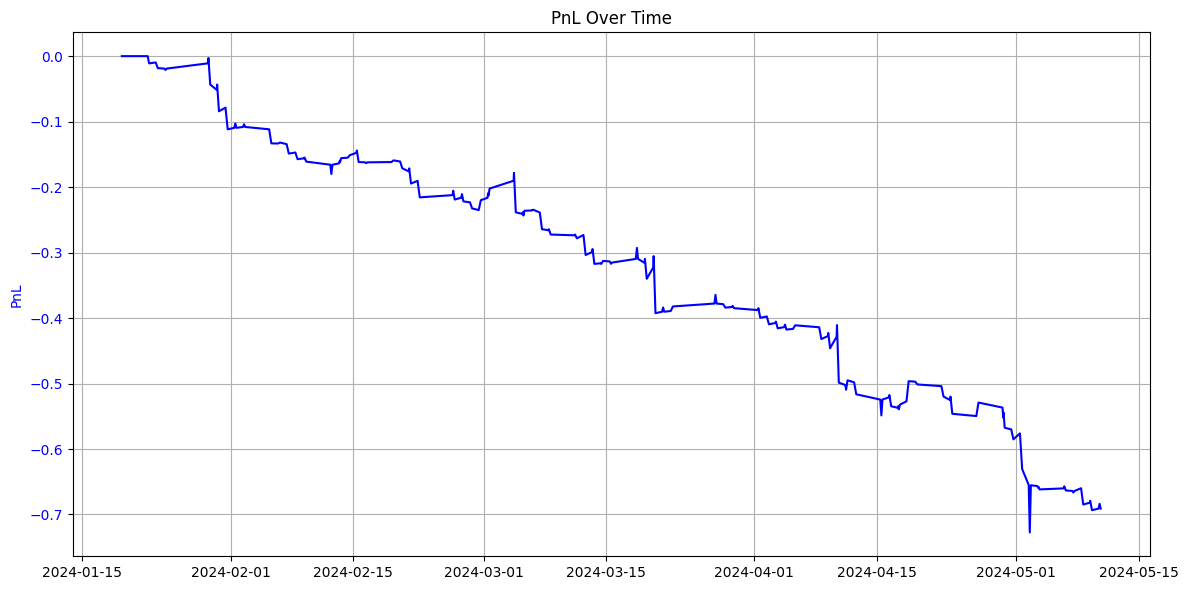

Strategy: ./strategy_bollinger_bands_intraday
AAPL resampling 60


/Users/andreyperfilyev/Python/Manifold Tech/pyalgostrategypool/pyalgostrategypool/backtester.py:35: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.data_resampled = self.data_1min.resample(str(nmin)+'T').agg({


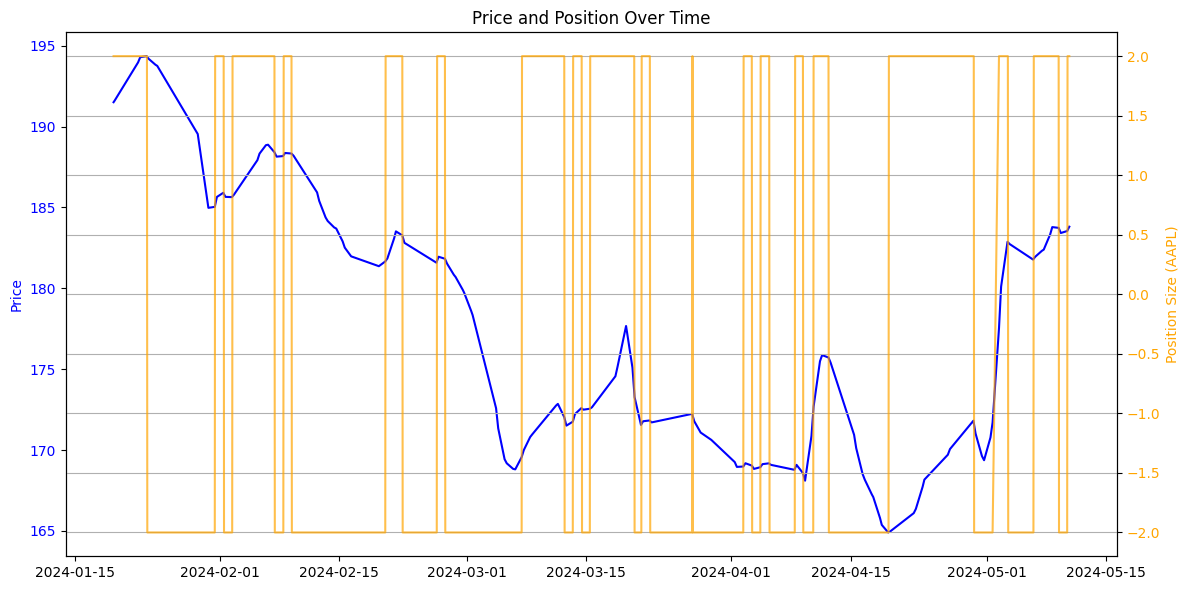

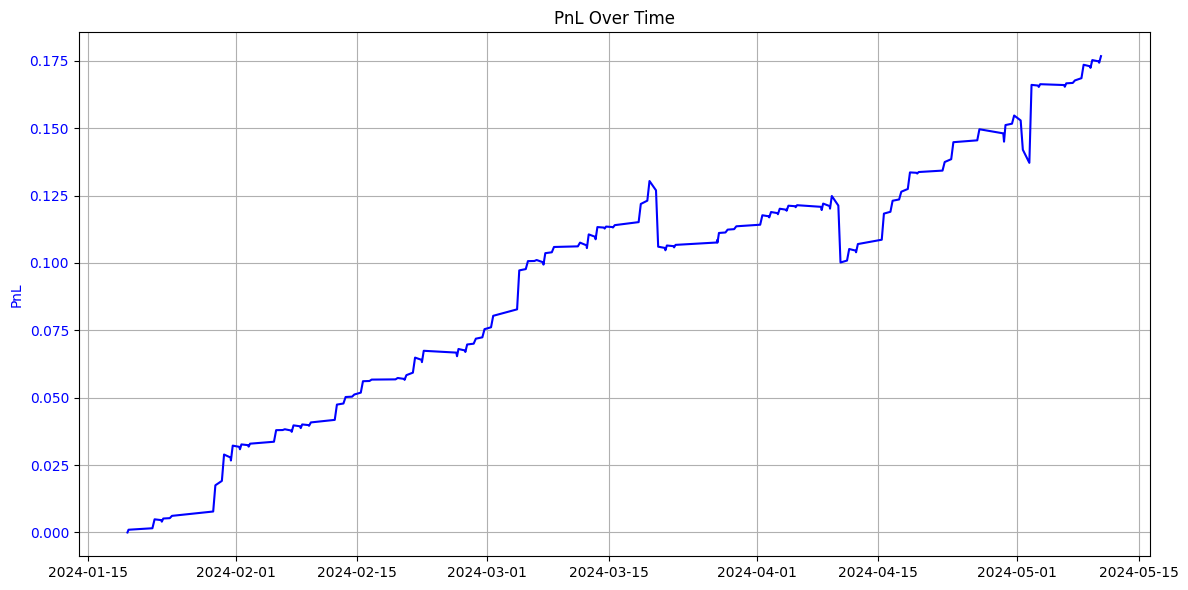

Strategy: ./strategy_vwap_crossover_delivery
AAPL resampling 60
SKIP
Strategy: ./strategy_rsi_macd_crossover_delivery
AAPL resampling 60


/Users/andreyperfilyev/Python/Manifold Tech/pyalgostrategypool/pyalgostrategypool/backtester.py:35: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.data_resampled = self.data_1min.resample(str(nmin)+'T').agg({
/Users/andreyperfilyev/Python/Manifold Tech/pyalgostrategypool/pyalgostrategypool/backtester.py:35: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.data_resampled = self.data_1min.resample(str(nmin)+'T').agg({


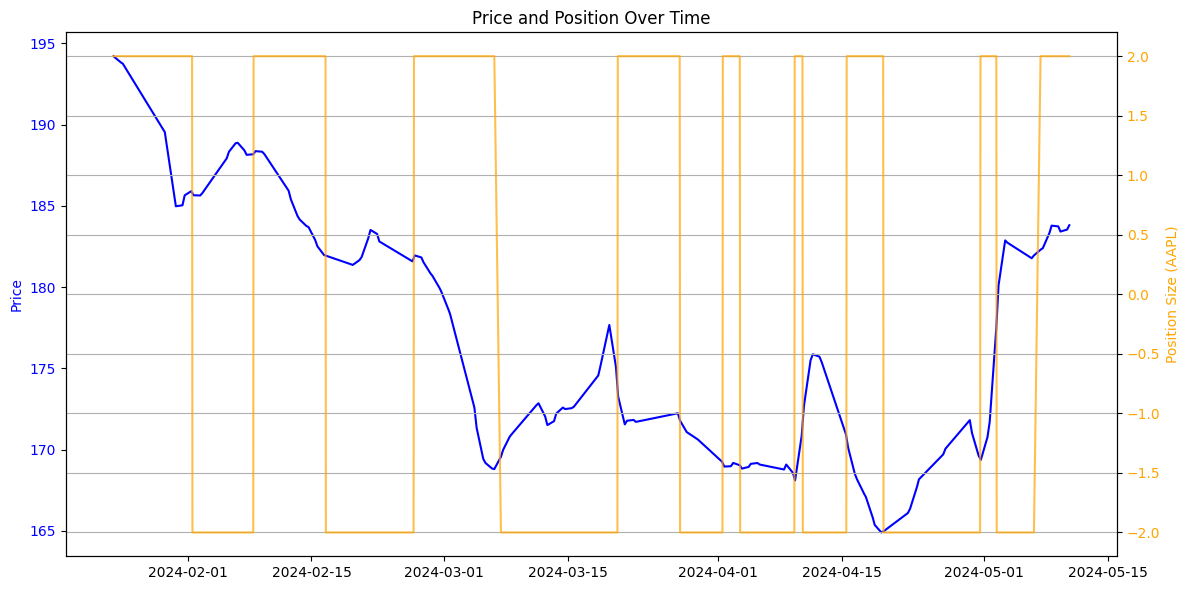

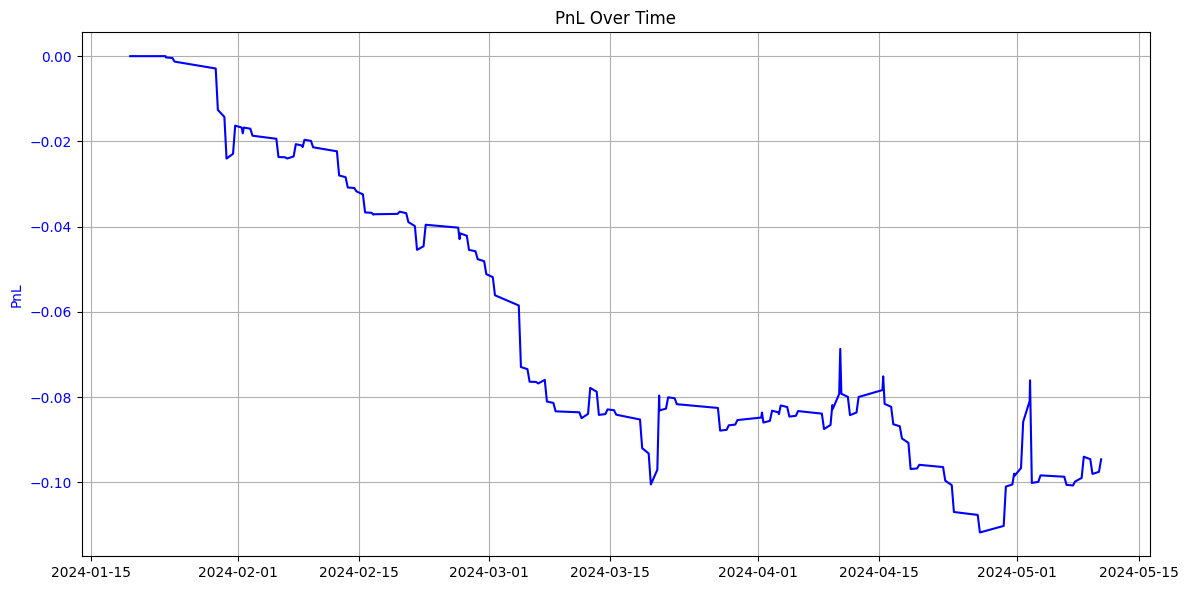

Strategy: ./strategy_mean_reversion_bollinger_bands_intraday
AAPL resampling 60


/Users/andreyperfilyev/Python/Manifold Tech/pyalgostrategypool/pyalgostrategypool/backtester.py:35: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.data_resampled = self.data_1min.resample(str(nmin)+'T').agg({


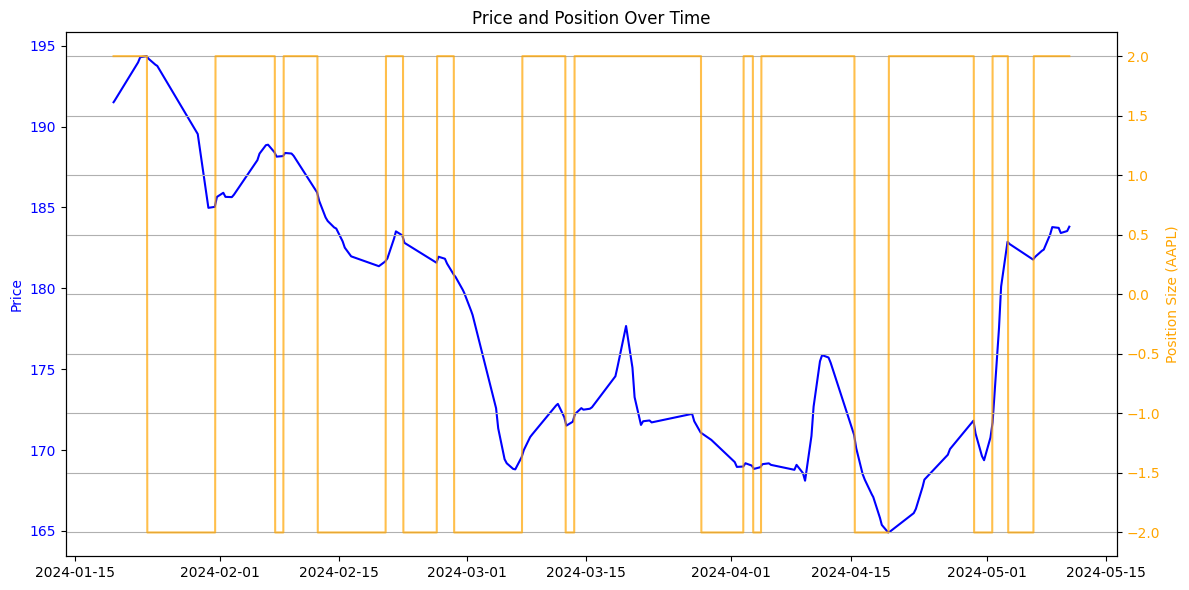

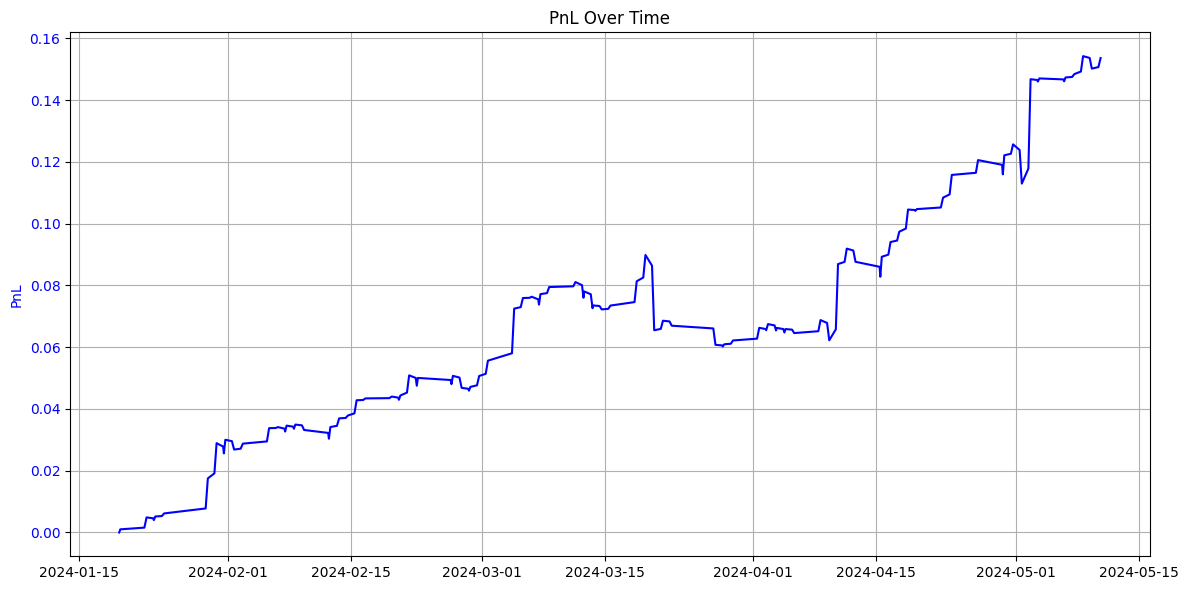

Strategy: ./strategy_inverse_ema_scalping_regular_order_intraday
AAPL resampling 60


/Users/andreyperfilyev/Python/Manifold Tech/pyalgostrategypool/pyalgostrategypool/backtester.py:35: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.data_resampled = self.data_1min.resample(str(nmin)+'T').agg({


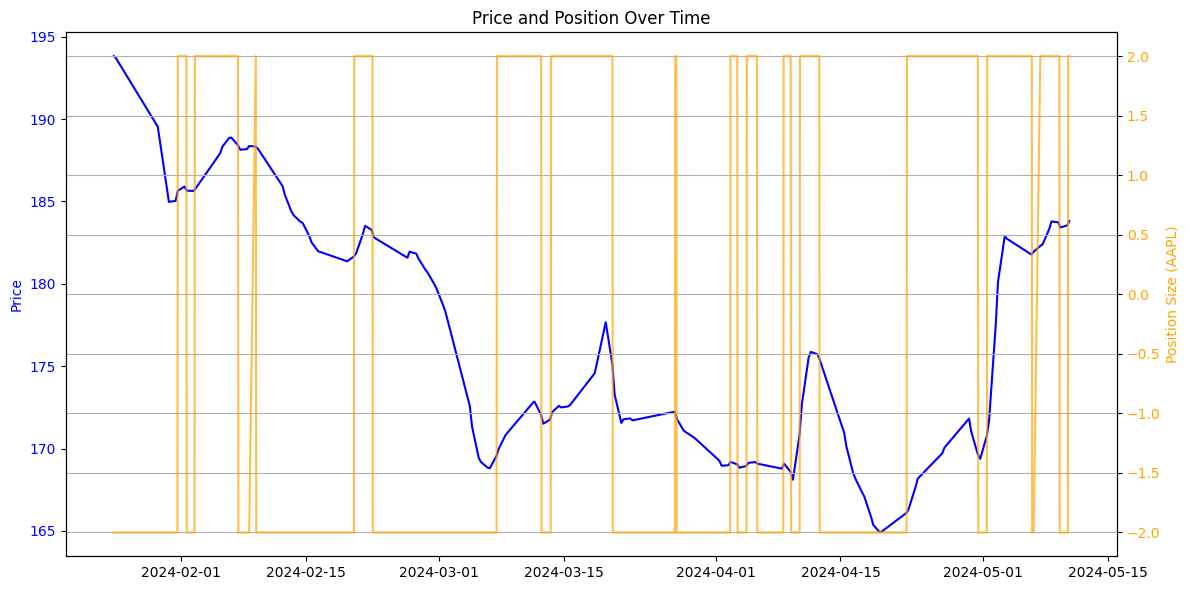

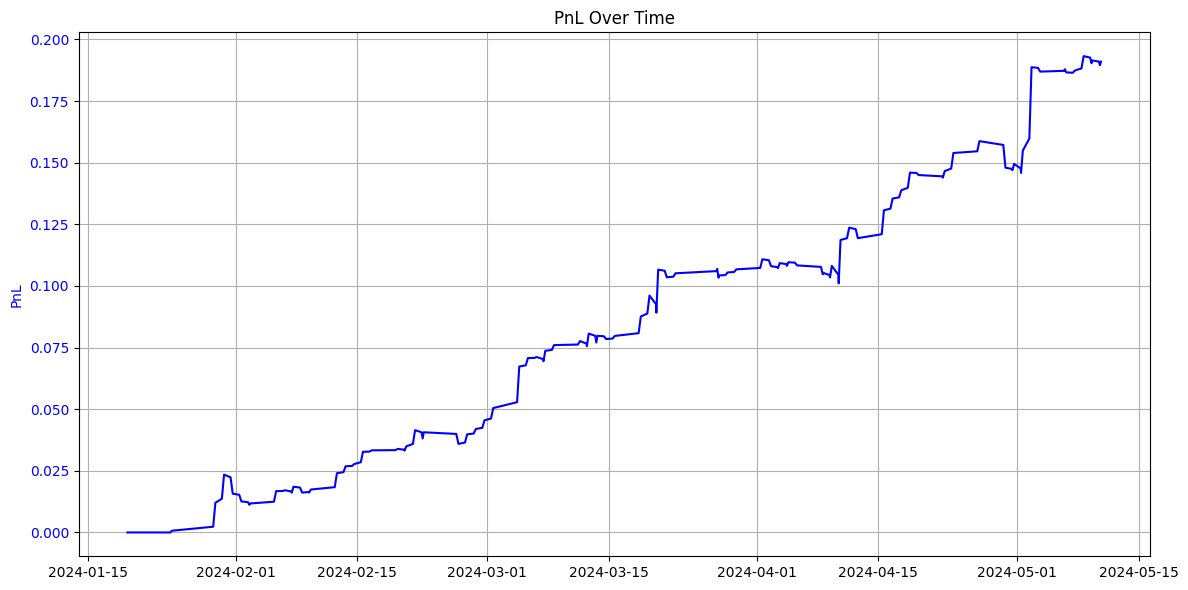

Strategy: ./strategy_volatility_trend_atr_delivery
AAPL resampling 60


/Users/andreyperfilyev/Python/Manifold Tech/pyalgostrategypool/pyalgostrategypool/backtester.py:35: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.data_resampled = self.data_1min.resample(str(nmin)+'T').agg({


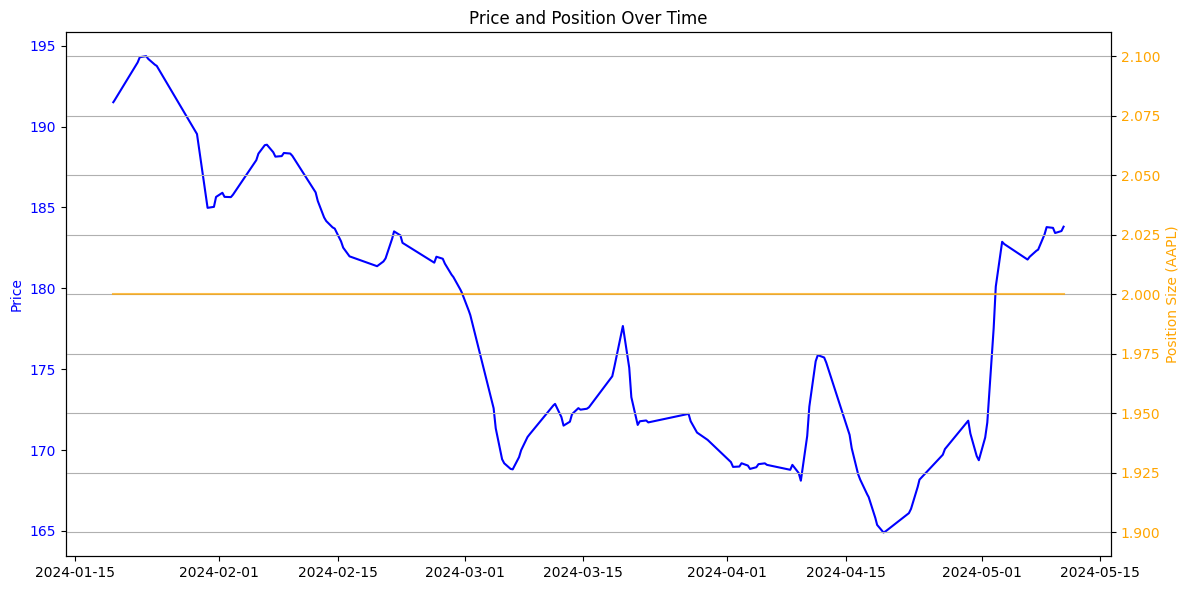

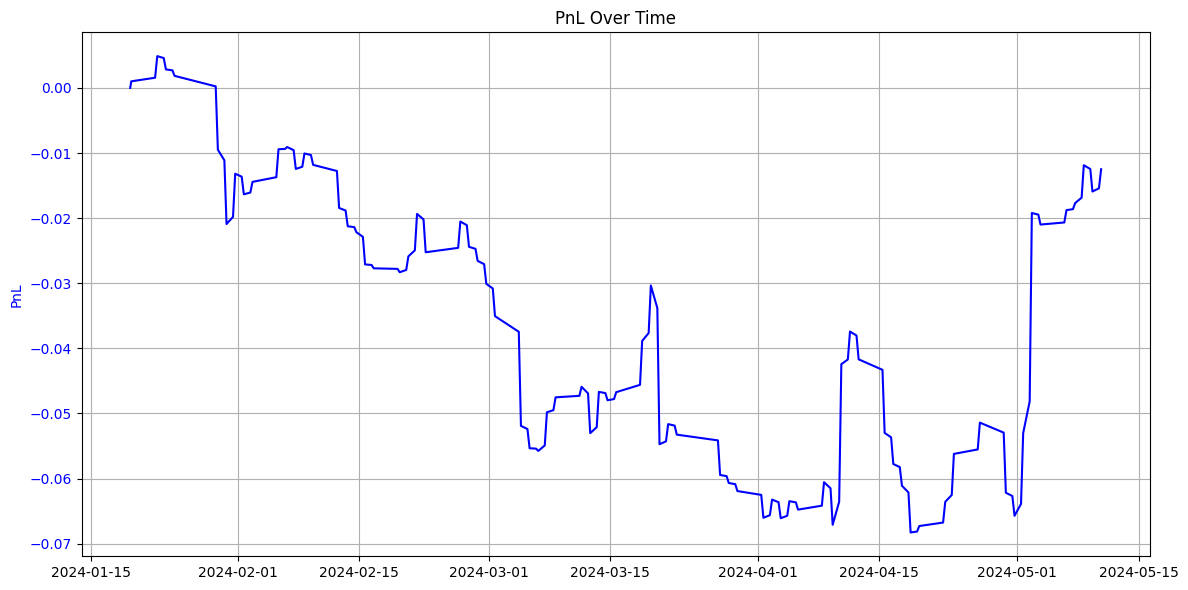

Strategy: ./strategy_reverse_rsi_crossover_intraday
AAPL resampling 60


/Users/andreyperfilyev/Python/Manifold Tech/pyalgostrategypool/pyalgostrategypool/backtester.py:35: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.data_resampled = self.data_1min.resample(str(nmin)+'T').agg({


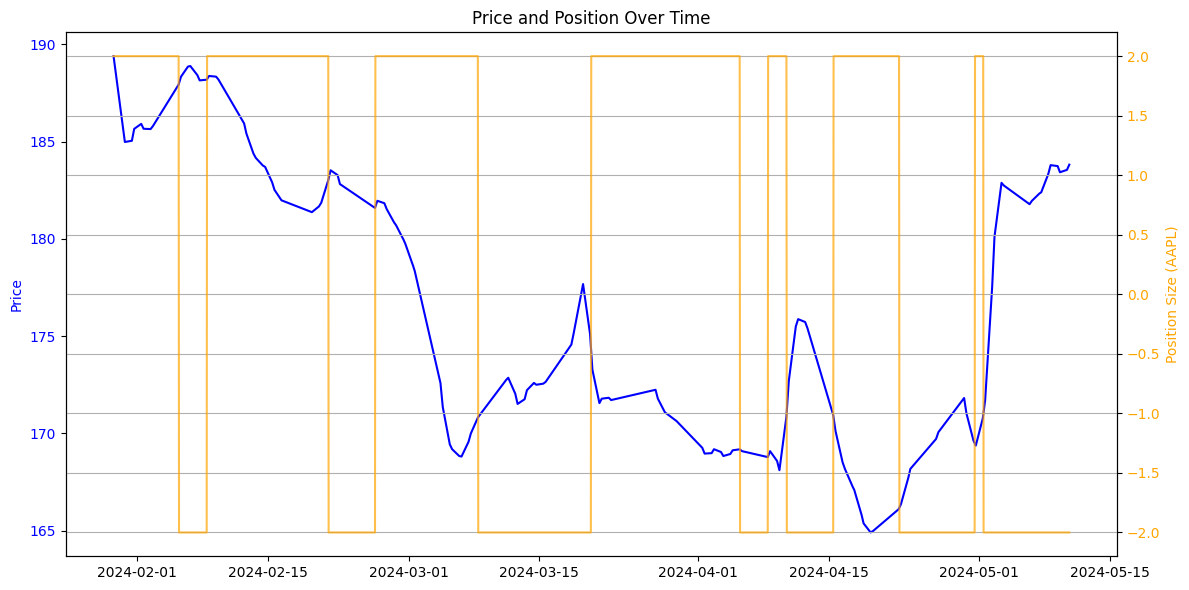

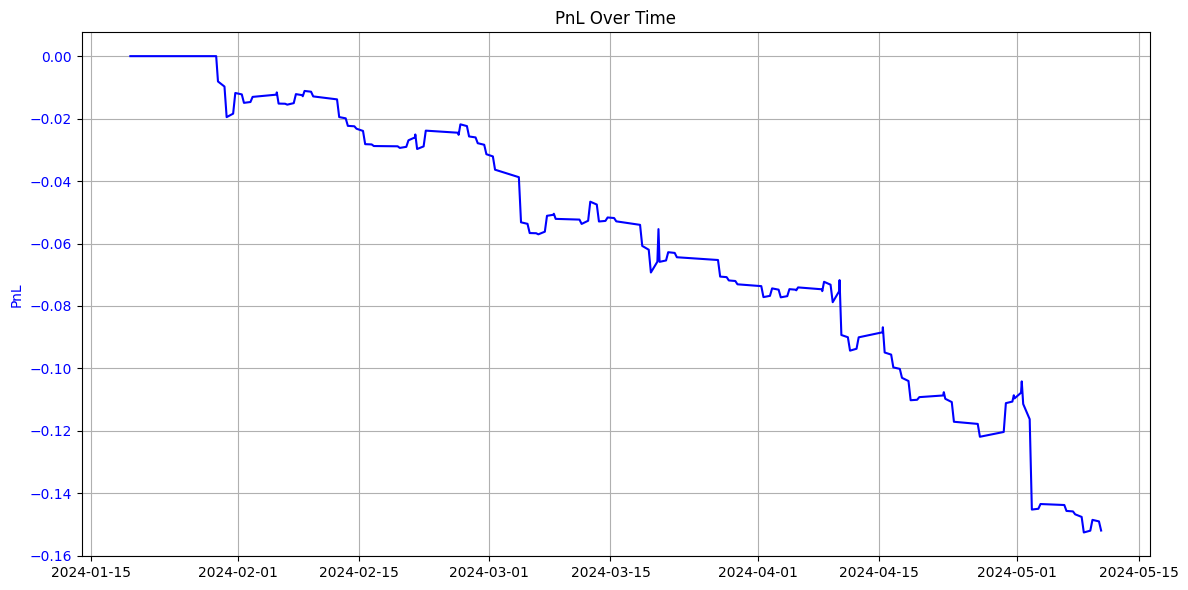

Strategy: ./strategy_aroon_crossover_delivery
AAPL resampling 15


/Users/andreyperfilyev/Python/Manifold Tech/pyalgostrategypool/pyalgostrategypool/backtester.py:35: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.data_resampled = self.data_1min.resample(str(nmin)+'T').agg({


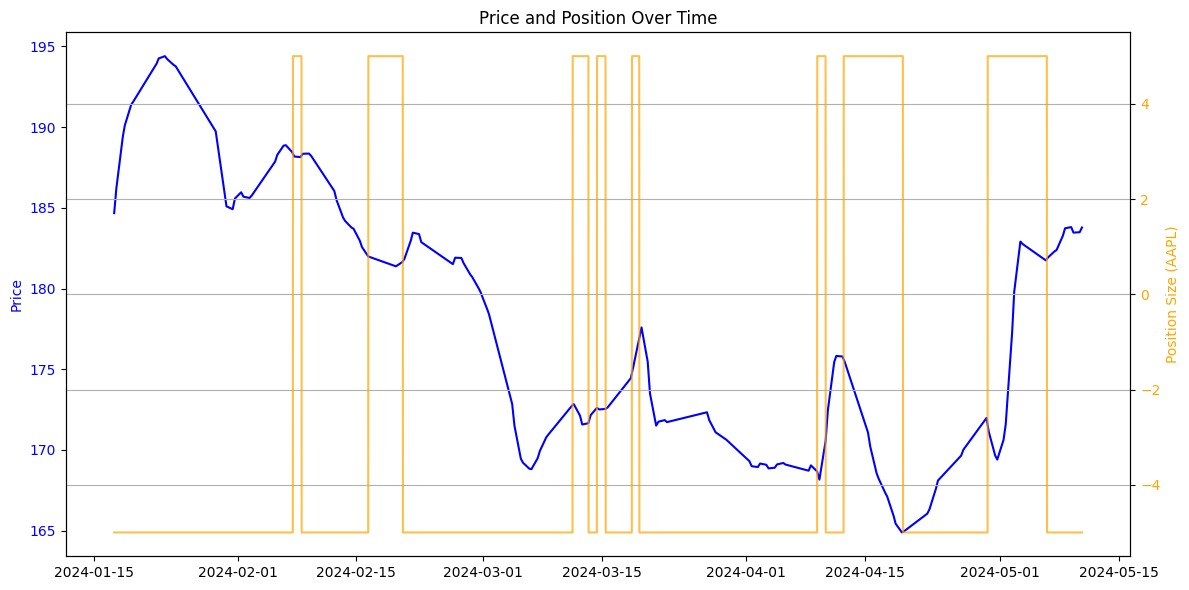

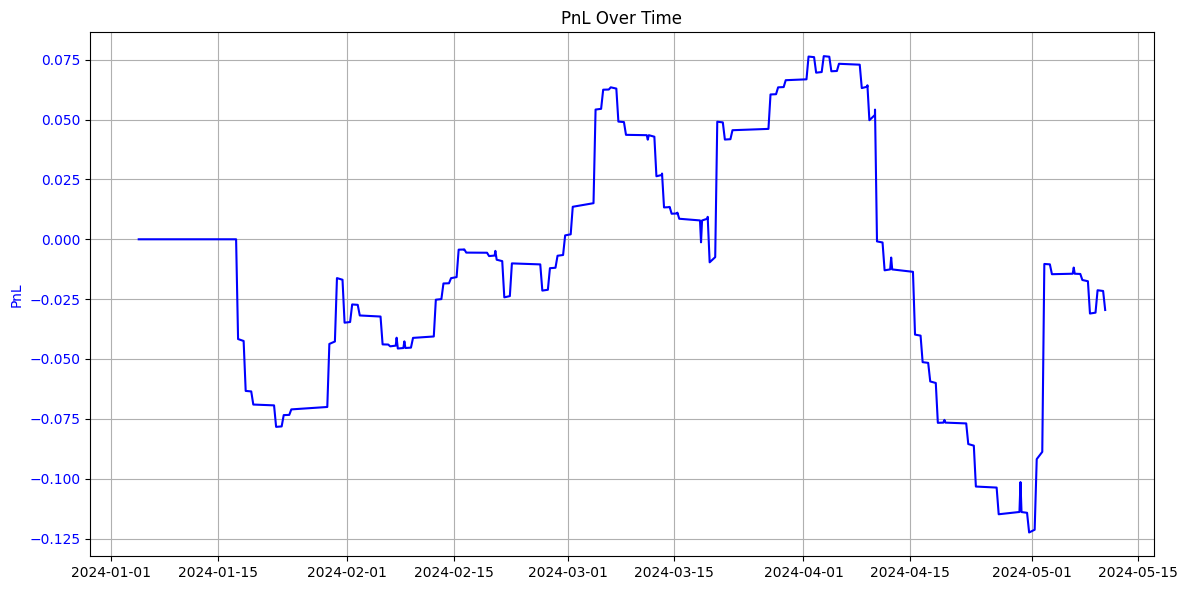

In [57]:
for path in strategy_subfolders:
    print('Strategy:', path)
    try:
        simulate_strategy(path, [aapl] ,'20240101', None, verbose=False)
    except:
        print('SKIP')